In [1]:

import pandas as pd
import torch
from torch import nn
import numpy as np
import torch.optim  as optim
import matplotlib.pyplot as plt
device="cuda" if torch.cuda.is_available() else "cpu"


Text(0.5, 1.0, 'Label: 9')

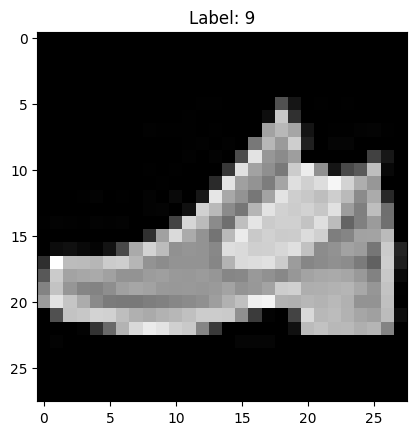

In [2]:
trainSet=pd.read_csv(r"D:\Datasets\MNIST Fashion\fashion-mnist_train.csv")
testSet=pd.read_csv(r"D:\Datasets\MNIST Fashion\fashion-mnist_test.csv")
image_data = trainSet.iloc[1, 1:].values  # Pixel values
image_label = trainSet.iloc[1, 0]         # Label

# Reshape the image data into 28x28 pixels
image_data = image_data.reshape(28, 28)

# Display the image
plt.imshow(image_data, cmap='gray')
plt.title(f'Label: {image_label}')


In [3]:
#Checking null values
print(trainSet.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [4]:
#Splitting the dataframe
print(torch.cuda.is_available())
print(device)
train_x,train_y=torch.from_numpy(np.array(trainSet.iloc[:,1:])),torch.from_numpy(np.array(trainSet.iloc[:,0]))
train_x=train_x.to(device)
train_y=train_y.to(device)
test_x,test_y=torch.from_numpy(np.array(testSet.iloc[:,1:])),torch.from_numpy(np.array(testSet.iloc[:,0]))
test_x=test_x.to(device)
test_y=test_y.to(device)

#Standarizing the pixels
train_x,test_x=train_x/255.0,test_x/255.0

#One hot  encoding the labels
train_y=torch.eye(10,device=device)[train_y]


True
cuda


In [5]:
#Actual model code
class FashionClassifier(nn.Module):
    def __init__(self,lr,epochs,neurons):
        super().__init__()
        self.lr=lr
        self.epochs=epochs
        self.neuron_no=neurons
        self.l1=nn.Linear(784,self.neuron_no,device=device)
        self.l2=nn.Linear(self.neuron_no,self.neuron_no,device=device)
        self.l3=nn.Linear(self.neuron_no,10,device=device)
        self.relu=nn.ReLU()
        self.optimizer=optim.SGD(params=self.parameters(),momentum=0.9,lr=self.lr)
        nn.init.kaiming_uniform_(self.l1.weight,nonlinearity='relu')
        nn.init.kaiming_uniform_(self.l2.weight,nonlinearity='relu')
        nn.init.kaiming_uniform_(self.l3.weight,nonlinearity='relu')
        

    def forward(self,x:torch.Tensor)->torch.Tensor:
        x=self.relu(self.l1(x))
        x=self.relu(self.l2(x))
        return self.l3(x)

    def fit(self,x:torch.Tensor,y:torch.Tensor)->None:
        self.train()
        loss_fn=nn.CrossEntropyLoss()
        for i in range(self.epochs):
            print(f"Iteration {i}")
            y_pred=self.forward(x)
            loss=loss_fn(y_pred,y)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            self.eval()
            with torch.inference_mode():
                if i%10==0:
                    print(f"Loss={loss}")
            self.train()
    

In [6]:
#Create an instance of the model
torch.manual_seed(42)
model=FashionClassifier(0.11,2000,38)
model.fit(train_x,train_y)


Iteration 0
Loss=2.423002004623413
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Loss=0.9643917679786682
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Loss=1.0783417224884033
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Loss=0.7853319644927979
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Loss=0.6397980451583862
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Loss=0.5777662992477417
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Loss=0.5388683080673218
Iteration 61
Iteration 62
Iteration 63
Iteration 6

In [10]:
#Test the model
model.eval()
y_pred=model.forward(test_x)
y_labels=torch.argmax(y_pred,dim=1)

In [11]:
#Test the accuracy
correct=torch.sum(y_labels==test_y)
print(f"Accuracy:{correct/100.0}")

Accuracy:87.29999542236328


<h1> After numerous tries , i could only optimize the accuracy to 87%

In [13]:
#Saving tHe model
torch.save(model,'FashionMnist.pth')

<h1>Now the task left is  to create a GUI for new predictions</h1>